# User Segmentation useing Clustering Techniques

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

Some description text

A scree plot is a simple way to visualize how much variance is explained by each principal component in a PCA (Principal Component Analysis).

The x-axis is the component number (1, 2, …)

The y-axis is the proportion (or %) of variance explained by each component.

It helps you decide how many components to keep — you usually look for an “elbow” point where adding more components gives diminishing returns.

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [229]:
df = pd.read_csv("marketing_campaign.csv.xls", sep='\t')

In [230]:
df.shape

(2240, 29)

In [231]:
df[:3].T

,0,1,2
ID,5524,2174,4141
Year_Birth,1957,1954,1965
Education,Graduation,Graduation,Graduation
Marital_Status,Single,Single,Together
Income,58138.0,46344.0,71613.0
Kidhome,0,1,0
Teenhome,0,1,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013
Recency,58,38,26
MntWines,635,11,426


In [232]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')
categorical_columns = list(df.select_dtypes(include='object').columns)
df['Cohort'] = (df.Dt_Customer.max() - df.Dt_Customer).dt.days
df['Age'] = df.Dt_Customer.max().year - df.Year_Birth
df['TotalAccCmp'] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response
for i in categorical_columns:
    print(df[i].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [233]:
# ohe = OneHotEncoder(sparse_output=False, drop=None)
# encoded = ohe.fit_transform(df[categorical_columns])
# columns = ohe.get_feature_names_out(categorical_columns)
# encoded_df = pd.DataFrame(encoded, columns=columns, index=df.index)
# df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)
# df.head()
encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [234]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Education,2240.0,2.39375,0.0,2.0,2.0,3.0,4.0,1.124797
Marital_Status,2240.0,3.729911,0.0,3.0,4.0,5.0,7.0,1.076277
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393


In [235]:
df.drop(['Z_CostContact', 'Z_Revenue', ], axis=1, inplace=True)
df = df[(df.Income<200000) & (df.Age<80)].reset_index(drop=True)

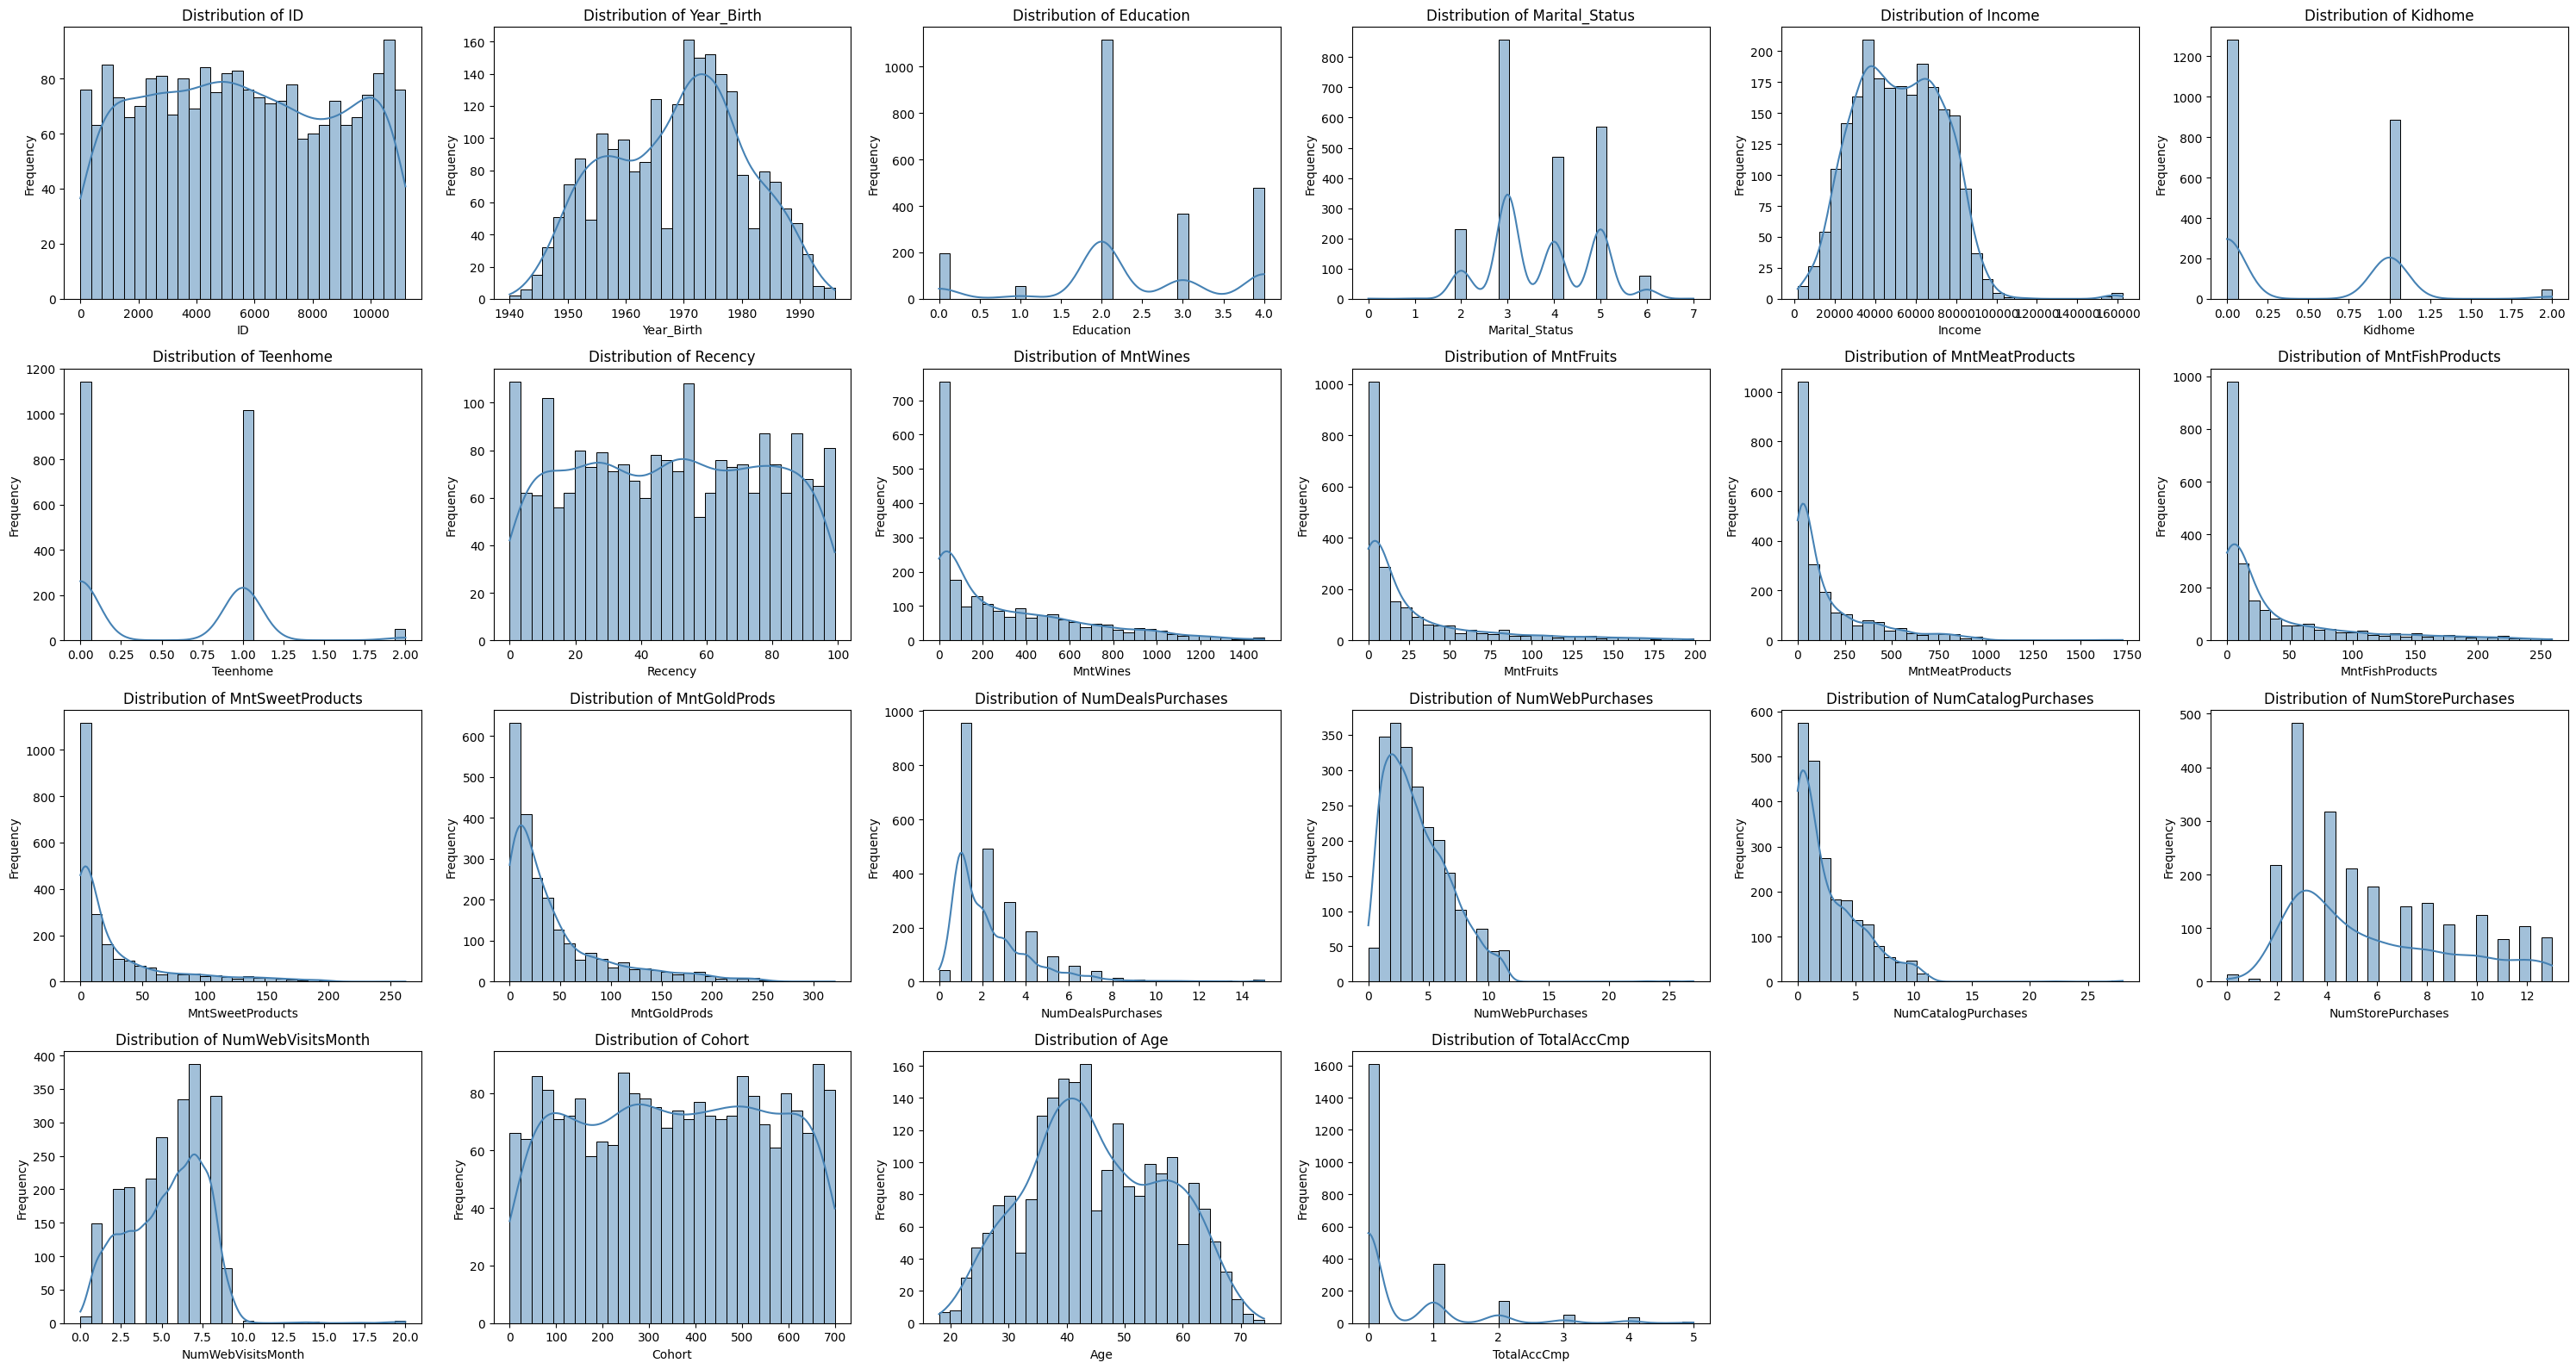

In [236]:
numeric_cols = df.select_dtypes(include='number').columns
binary_cols = [col for col in numeric_cols if df[col].nunique() == 2]
numeric_cols = [col for col in numeric_cols if col not in binary_cols]
n_cols = 6
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color='steelblue')
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

for ax in axes.flatten()[len(numeric_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

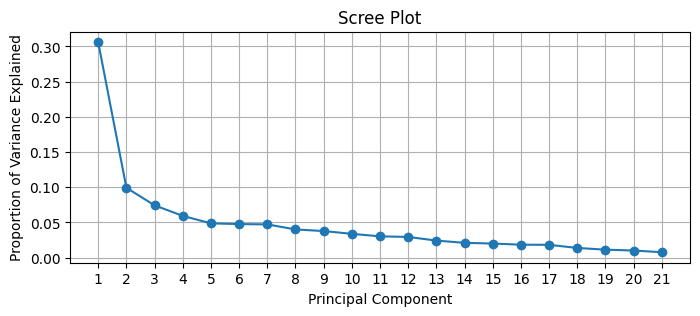

In [237]:
X = df.select_dtypes(include='number').drop(['ID', 'Year_Birth', 
                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 3))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='-')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.show()

#### To meet the 75% explained variance benchmark, we need to retain 8 factors. Reducing to 2 factors captures about 48% of the variance.

In [238]:
cumulative_variance = np.cumsum(explained_variance)
sum(cumulative_variance<0.75), cumulative_variance[2]

(8, 0.4796804687974371)

In [251]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=[f"PC{i+1}" for i in range(n_components)])

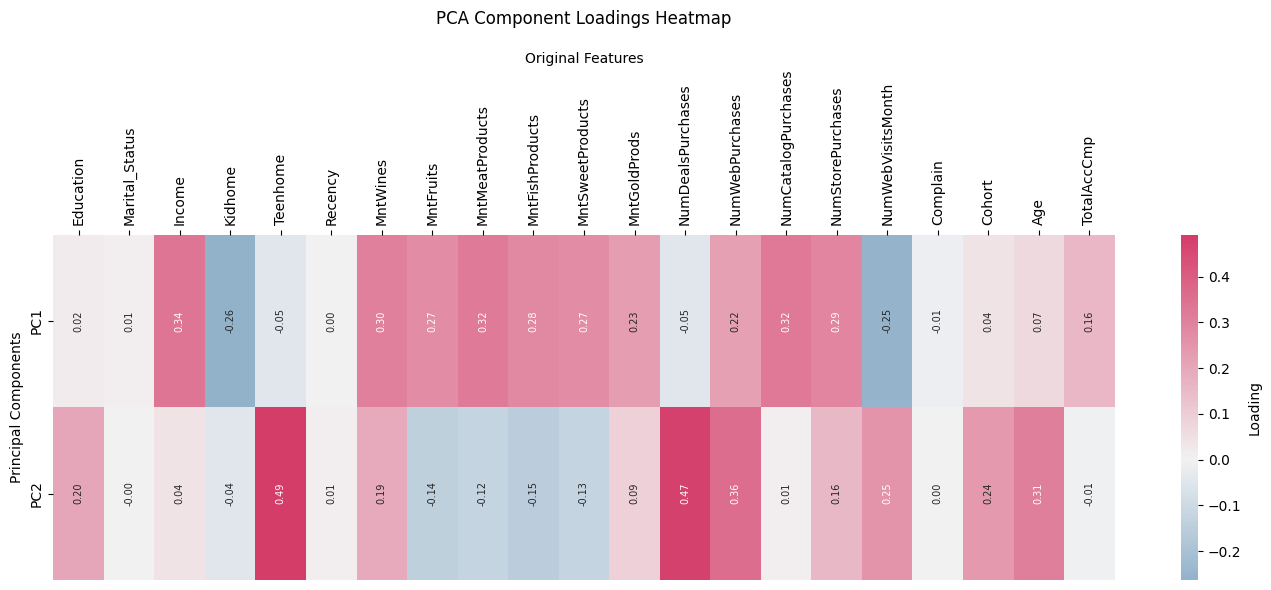

In [252]:
plt.figure(figsize=(14, 6))
sns.heatmap(components_df, cmap=sns.diverging_palette(240, 0, s=75, l=50, center="light", as_cmap=True),
    center=0, annot=True, fmt=".2f", annot_kws={"rotation": 90, "fontsize": 7}, cbar_kws={"label": "Loading"})
plt.title("PCA Component Loadings Heatmap", pad=20)
plt.ylabel("Principal Components")
plt.xlabel("Original Features")
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top') 
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### PC1: Affluent, premium shoppers — high income and spending across categories, fewer kids, multi-channel.
#### PC2: Family-focused, campaign- and deal-engaged shoppers — moderate spending, responsive to promotions.

In [253]:
n_clusters = 2
factor_clusters = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(components_df)
components_df['Cluster'] = factor_clusters
components_df.Cluster

PC1    0
PC2    1
Name: Cluster, dtype: int32

In [254]:
pca_df = pd.DataFrame(X_pca, columns=components_df.index)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df)
pca_df['Cluster'] = clusters
df['Cluster'] = clusters

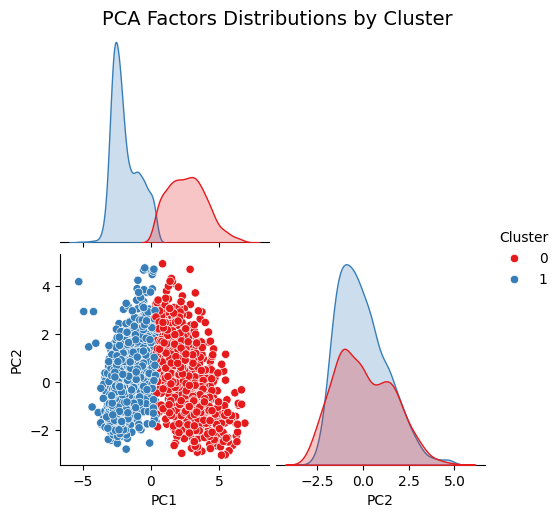

In [255]:
sns.pairplot(pca_df, hue='Cluster', palette='Set1', corner=True)
plt.suptitle("PCA Factors Distributions by Cluster", y=1.02, fontsize=14)
plt.show()

In [256]:
sil_score = silhouette_score(pca_df[components_df.index], clusters)
print(f"Silhouette Score: {sil_score:.2f}")
#this is the highest silhouette score among tested combinations (with cluster 2, with 3=0.45, with 9 components and 2 clusters its 0.26) 

Silhouette Score: 0.53


#### Reducing to 2 components (≈ 48% variance explained) and 2 clusters yielded the highest silhouette score, 0.53, indicating the best balance between cohesion and separation among the clusters

<Axes: xlabel='Cluster'>

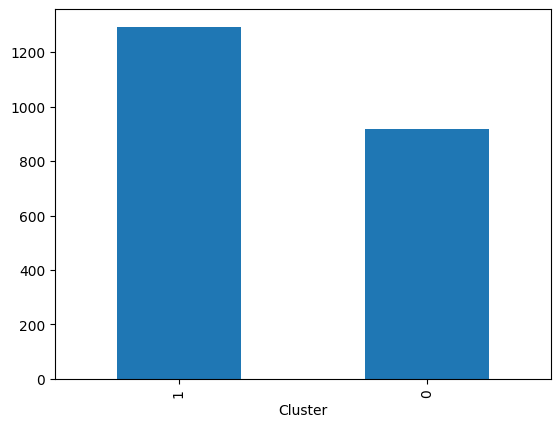

In [258]:
df.Cluster.value_counts().plot.bar()

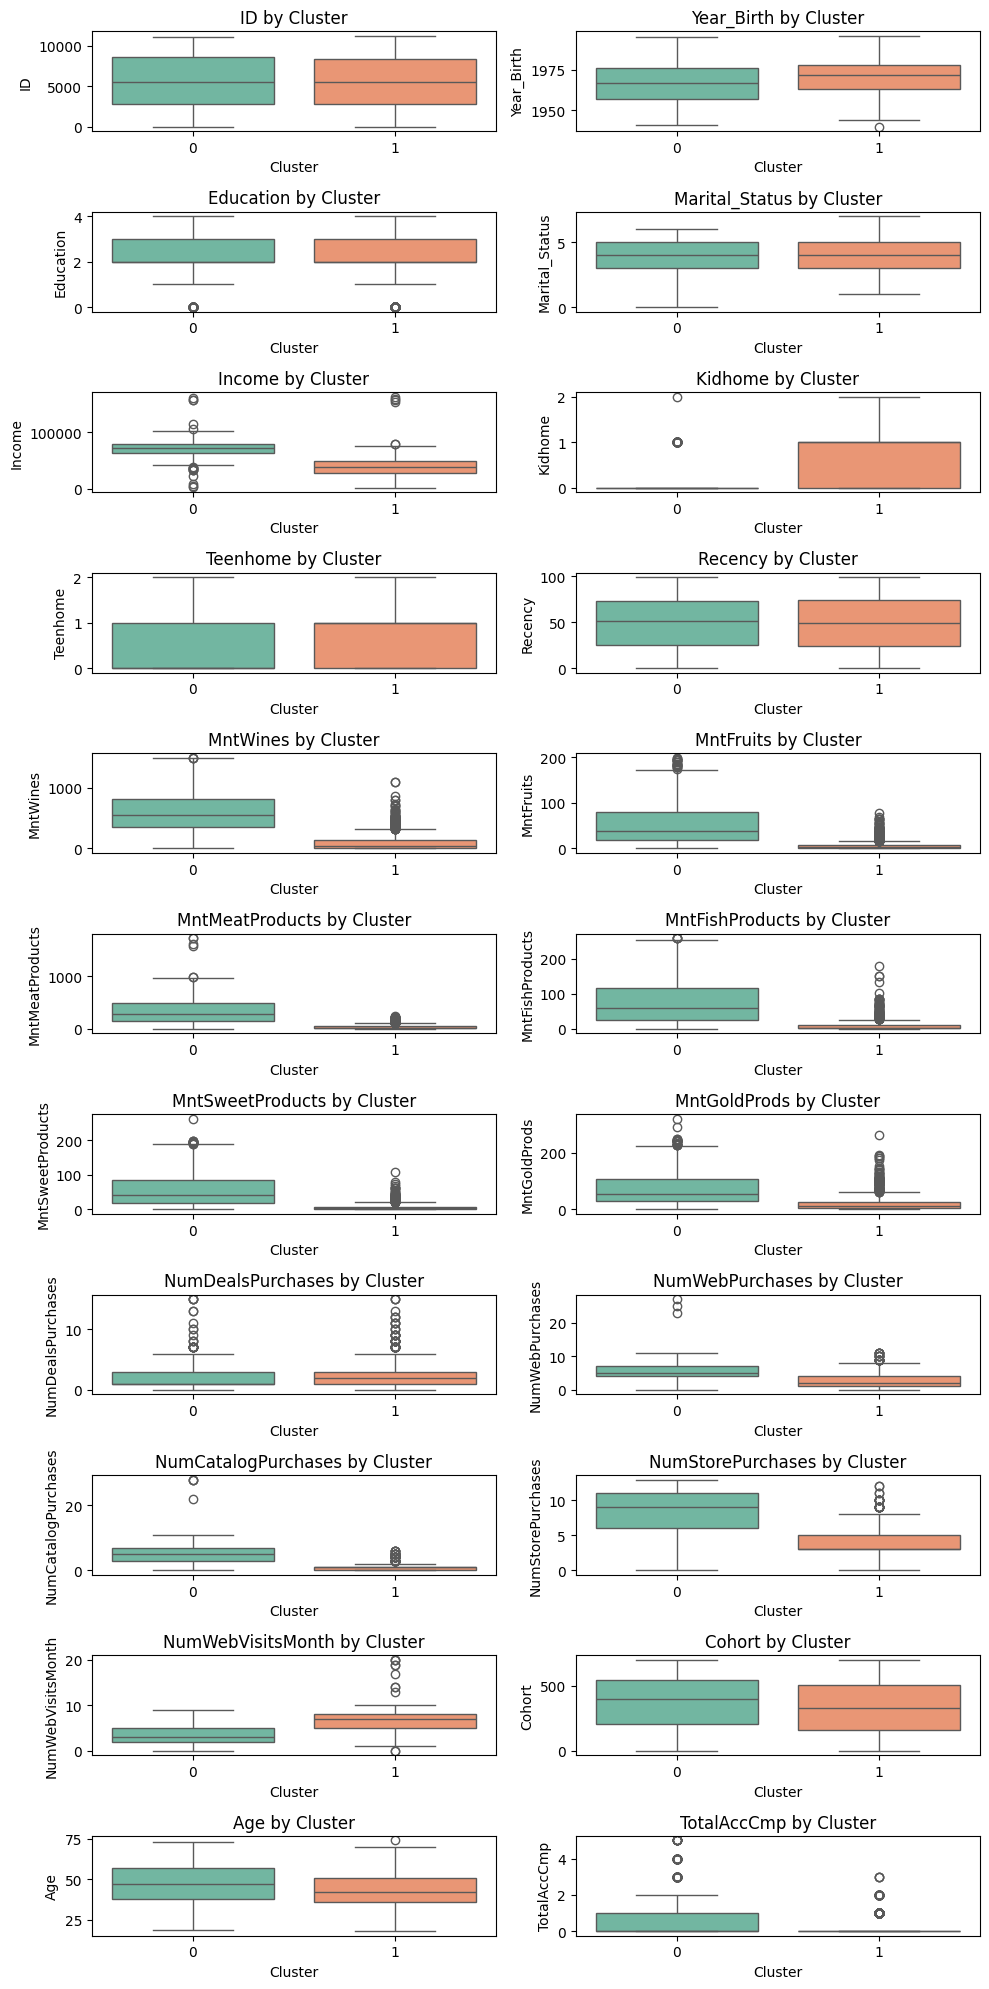

In [264]:
features_to_plot = numeric_cols
fig, axes = plt.subplots(11, 2, figsize=(10, 20))

for ax, feature in zip(axes.flatten(), features_to_plot):
    sns.boxplot(data=df, x='Cluster', y=feature, ax=ax, palette='Set2')
    ax.set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

In [265]:
df[['Cluster', 'Income', 'Age', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'NumWebPurchases', 'Recency']].groupby('Cluster').mean()

,Income,Age,MntWines,MntMeatProducts,MntGoldProds,NumWebPurchases,Recency
Cluster,,,,,,,
0,71046.214363,47.142546,598.719260,351.961915,75.279652,5.761697,49.249184
1,38392.434648,43.624903,96.730858,35.589327,21.641145,2.898685,48.856148


In [266]:
df['Marital_Status'] = encoders['Marital_Status'].inverse_transform(df['Marital_Status'])
df['Education'] = encoders['Education'].inverse_transform(df['Education'])

In [267]:
df.groupby('Cluster')['Education'].value_counts(normalize=True).reset_index()\
        .pivot(index="Education", columns=["Cluster"], values="proportion")

Cluster,0,1
Education,,
2n Cycle,0.083787,0.093581
Basic,0.001088,0.040990
Graduation,0.523395,0.490333
Master,0.146899,0.177881
PhD,0.244831,0.197216


In [268]:
df.groupby('Cluster')['Marital_Status'].value_counts(normalize=True).reset_index()\
        .pivot(index="Marital_Status", columns=["Cluster"], values="proportion")

Cluster,0,1
Marital_Status,,
Absurd,0.002176,NaN
Alone,NaN,0.002320
Divorced,0.112078,0.098995
Married,0.375408,0.395978
Single,0.212187,0.212684
Together,0.254625,0.260634
Widow,0.043526,0.027842
YOLO,NaN,0.001547


In [269]:
df[['Cluster', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'TotalAccCmp']]\
        .groupby('Cluster').mean()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,TotalAccCmp
Cluster,,,,,,,,
0,0.145811,0.030468,0.084875,0.126224,0.17519,0.007617,0.228509,0.791077
1,0.006187,0.001547,0.065739,0.037123,0.00000,0.010054,0.095128,0.205723


In [270]:
df[['Cluster', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]\
        .groupby('Cluster').mean()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,
0,2.014146,5.761697,5.242655,8.548422,3.747552
1,2.545244,2.898685,0.845321,3.857695,6.440062


#### Spending and Income  
Cluster 0 has higher average income (around 71,046) compared to Cluster 1 (around 38,392).   
Cluster 0 spends much more on wines, meat, and gold products than Cluster 1.   
Web purchases are higher in Cluster 0, while both clusters have similar recency of last purchase.   

#### Education  
Both clusters are mostly composed of customers with a “Graduation” degree.  
Cluster 0 has slightly more PhDs, while Cluster 1 has slightly more people with “Basic” and “2n Cycle” education.  

#### Marital Status  
Both clusters have similar proportions of married and together customers.  
Cluster 0 has slightly higher proportions of widowed and divorced customers.  
Cluster 1 has a few customers categorized as “Alone” and “YOLO,” which are not present in Cluster 0.  

#### Campaign Responses   
Cluster 0 responds more to campaigns and accepts more offers than Cluster 1.   
Acceptance rates for all campaigns and total campaign acceptance are higher in Cluster 0.   
The overall response rate is higher in Cluster 0 as well.   

#### Purchasing Channels and Behavior  
Cluster 0 makes more catalog and store purchases than Cluster 1.   
Cluster 0 also makes more web purchases on average.   
Cluster 1 tends to use deals more and visits websites more frequently than Cluster 0.   


# SUMMARY

Recommendations from segmentation analysis:

#### For Cluster 0 (affluent, high-spending, premium customers)
Offer exclusive premium product bundles (e.g., wines, meats, gold products) tailored to their spending preferences.   
Expand loyalty and VIP programs, rewarding their high spending and encouraging repeat purchases.   
Maintain and enhance multi-channel campaigns, leveraging catalog, store, and web channels, since this segment engages across all of them.    
Personalize campaign offers further — they already respond well (better than C1), so targeted and exclusive offers can drive even more conversions.   

#### For Cluster 1 (lower-income, deal-seeking, digitally active customers)
Design discount-based promotions and flash sales, since this group responds to deals and visits websites more often.   
Emphasize digital campaigns and online engagement, as this segment spends more time on the website and is more digitally active.   
Simplify offers and make them accessible — smaller bundles, price-sensitive products, and easy online access will appeal to this group.   
Introduce gamified or referral-based campaigns to increase their engagement and encourage them to try premium products.   
